In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Import the data

In [73]:
GLOBAL_TRENDS_DS_PATH='kaggle2019/'

In [3]:
global_trends=pd.read_csv(GLOBAL_TRENDS_DS_PATH+"1- mental-illnesses-prevalence.csv")

In [4]:
global_trends.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [74]:
adult_population = pd.read_csv(GLOBAL_TRENDS_DS_PATH+"4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv")

In [75]:
adult_population.head()

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0


Preparing the data

In [40]:
global_trends.columns = global_trends.columns.str.lower().str.replace(' ', '_')

In [41]:
global_trends=global_trends.rename(columns = {'schizophrenia_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'schizophrenia',
       'depressive_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'depression',
       'anxiety_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'anxiety_disorders',
       'bipolar_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'bipolar_disorders',
       'eating_disorders_(share_of_population)_-_sex:_both_-_age:_age-standardized':'eating_disorders'
           })

In [42]:
global_trends.drop(columns=['schizophrenia','bipolar_disorders','eating_disorders','code'], inplace=True)

In [44]:
global_trends.isnull().sum()

entity               0
year                 0
depression           0
anxiety_disorders    0
dtype: int64

In [45]:
#Removing the duplicates if exist
global_trends = global_trends.drop_duplicates()

In [49]:
global_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entity             6420 non-null   object 
 1   year               6420 non-null   int64  
 2   depression         6420 non-null   float64
 3   anxiety_disorders  6420 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 200.8+ KB


Exploratory Data Analysis

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Scale a numerical feature (e.g., 'Depression (%)')
scaler = MinMaxScaler()
global_trends['depression_scaled'] = scaler.fit_transform(global_trends[['depression']])

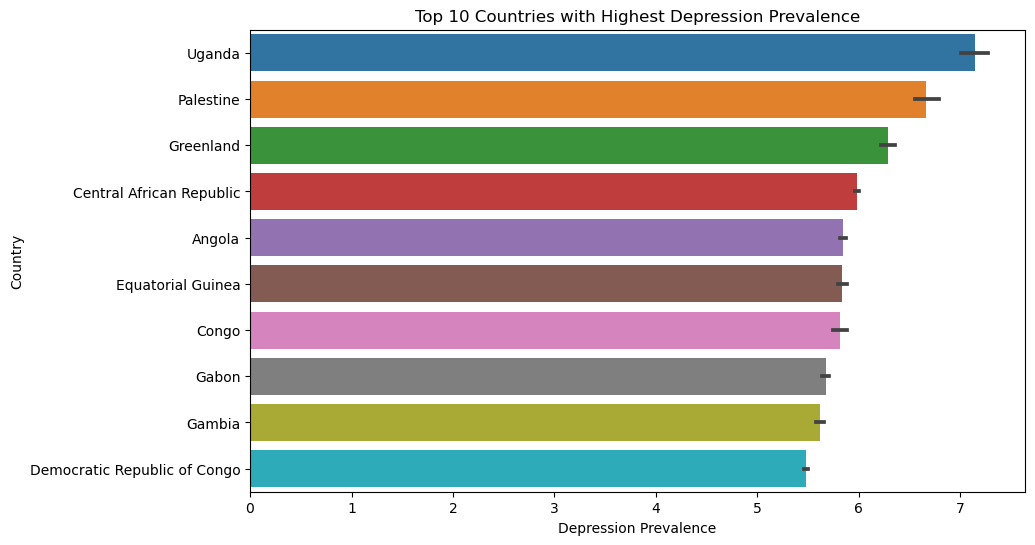

In [71]:
top_countries = global_trends.groupby('entity')['depression'].mean().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.barplot(x='depression', y='entity', data=global_trends[global_trends['entity'].isin(top_countries)], order = top_countries)
plt.title('Top 10 Countries with Highest Depression Prevalence')
plt.xlabel('Depression Prevalence')
plt.ylabel('Country')
plt.show()

In [56]:
illnesses=['depression','anxiety_disorders'] 
global_trends['total']=global_trends[illnesses].sum(axis=1)

In [57]:
global_trends_by_years=global_trends.groupby('year')[illnesses+['total']].mean()

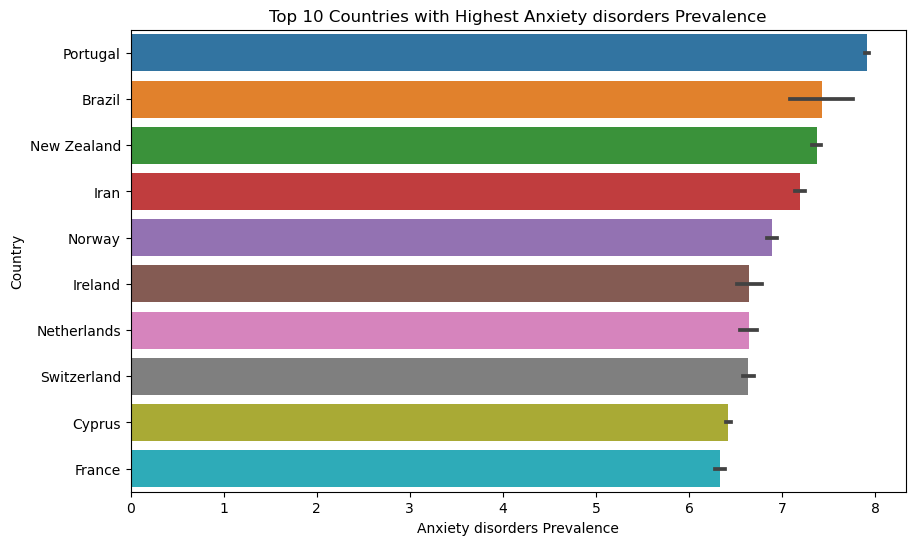

In [70]:
top_countries = global_trends.groupby('entity')['anxiety_disorders'].mean().nlargest(10).index
plt.figure(figsize=(10, 6))
sns.barplot(x='anxiety_disorders', y='entity', data=global_trends[global_trends['entity'].isin(top_countries)], order = top_countries)
plt.title('Top 10 Countries with Highest Anxiety disorders Prevalence')
plt.xlabel('Anxiety disorders Prevalence')
plt.ylabel('Country')
plt.show()

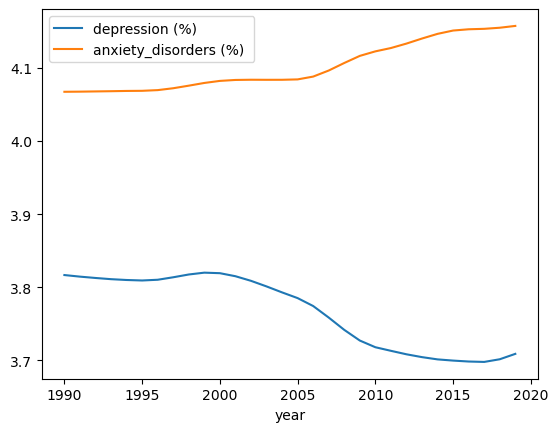

In [58]:
illnesses=['depression','anxiety_disorders'] 

for illness in illnesses:
    global_trends_by_years[illness].plot() 
    
plt.legend([illness+" (%) " for illness in illnesses])
plt.show()